# **순환 신경망으로 IMDB 분류**

## **자연어 처리(Natural Language Processing, NLP)**

In [5]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [9]:
type(train_input)

numpy.ndarray

In [11]:
type(train_input[0])

list

In [13]:
len(train_input[0])

218

In [15]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


* 0 : 패딩
* 1 : 문장의 시작
* 2 : 어휘사전에 없는 것

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [22]:
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(lengths[:20])

[218 189 141 550 147  43 123 562 233 130 450  99 117 238 109 129 163 752
 212 177]


In [28]:
print(np.mean(lengths), np.median(lengths))

238.71364 178.0


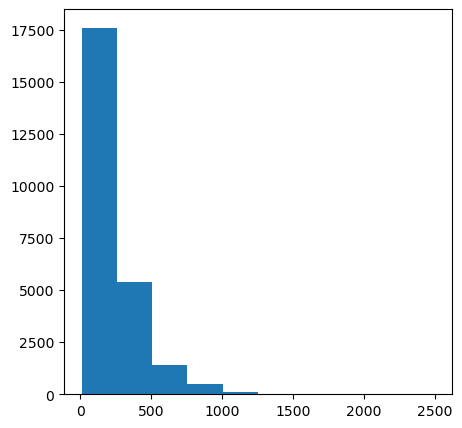

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.hist(lengths)
plt.show()

In [95]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_seq = pad_sequences(X_train, maxlen=100) # truncating='pre|post'
print(X_train_seq.shape)

(20000, 100)


In [97]:
print(X_train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [60]:
print(X_train_seq[5][-10:])

[  4 226  65  12  43 127  24   2  10  10]


In [68]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100, 500)))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [101]:
X_train_oh = keras.utils.to_categorical(X_train_seq)
print(X_train_oh.shape)

(20000, 100, 500)


In [103]:
print(X_train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [105]:
print(np.sum(X_train_oh[0][0]))

1.0


In [99]:
X_test_seq = pad_sequences(X_test, maxlen=100)

In [107]:
X_test_oh = keras.utils.to_categorical(X_test_seq)

In [109]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           4,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['acc'])
ch_cb = keras.callbacks.ModelCheckpoint('data/best-srnn-model.h5', save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(X_train_oh, y_train, epochs=100, batch_size=64, validation_data=(X_test_oh, y_test), callbacks=[ch_cb, es_cb])

Epoch 1/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8238 - loss: 0.4062

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - acc: 0.8238 - loss: 0.4062 - val_acc: 0.7900 - val_loss: 0.4591
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.8207 - loss: 0.4038

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.8207 - loss: 0.4038 - val_acc: 0.7888 - val_loss: 0.4579
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - acc: 0.8248 - loss: 0.4017 - val_acc: 0.7892 - val_loss: 0.4625
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - acc: 0.8272 - loss: 0.3956 - val_acc: 0.7868 - val_loss: 0.4636
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - acc: 0.8256 - loss: 0.3966 - val_acc: 0.7890 - val_loss: 0.4606


In [145]:
model.evaluate(X_train_oh, y_train)

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.8290 - loss: 0.3949


[0.39822420477867126, 0.827750027179718]

In [146]:
model.evaluate(X_test_oh, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7864 - loss: 0.4642


[0.4578530192375183, 0.7888000011444092]